# A minimal ALF run

In this bare-bones example we use the [pyALF](https://git.physik.uni-wuerzburg.de/ALF/pyALF) interface to run the canonical Hubbard model on a default configuration: a $6\times6$ square grid, with interaction strength $U=4$ and inverse temperature $\beta = 5$.  

Bellow we go through the steps for performing the simulation and outputting observables.

---

**1.** Import `Simulation` class from the `py_alf` python module, which provides the interface with ALF:

In [1]:
import os
import numpy as np
from py_alf import ALF_source, Simulation  # Interface with ALF

**2.** Create an instance of `Simulation`, setting parameters as desired:

In [2]:
alf_src = ALF_source(
    branch='211-add-nematic-dirac-hamiltonian'
)

Checking out branch 211-add-nematic-dirac-hamiltonian
Your branch is up to date with 'origin/211-add-nematic-dirac-hamiltonian'.


Already on '211-add-nematic-dirac-hamiltonian'


In [3]:
sim = Simulation(
    alf_src,
    "Hubbard",                             # Hamiltonian
    {                                      # Model and simulation parameters for each Simulation instance
        # "Model": "Hubbard",                # Base model
        # "Lattice_type": "Square"           # Lattice type
    },
)

**3.** Compile ALF, downloading it first from the [ALF repository](https://git.physik.uni-wuerzburg.de:ALF) if not found locally. This may take a few minutes:

In [4]:
#sim.compile()       # Compilation needs to be performed only once

**4.** Perform the simulation as specified in `sim`:

In [5]:
sim.run()

Prepare directory "/home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard" for Monte Carlo run.
1 VAR_lattice
2 Model
3 {'comment': 'Value not relevant', 'defined_in_base': False, 'value': 'Hubbard'}
1 VAR_lattice
2 Lattice_type
3 {'comment': '', 'defined_in_base': False, 'value': 'Square'}
1 VAR_lattice
2 L1
3 {'comment': 'Length in direction a_1', 'defined_in_base': False, 'value': 4}
1 VAR_lattice
2 L2
3 {'comment': 'Length in direction a_2', 'defined_in_base': False, 'value': 4}
1 VAR_Model_Generic
2 N_SUN
3 {'comment': 'Number of colors', 'defined_in_base': True, 'value': 2}
1 VAR_Model_Generic
2 N_FL
3 {'comment': 'Number of flavors', 'defined_in_base': True, 'value': 1}
1 VAR_Model_Generic
2 Phi_X
3 {'comment': 'Twist along the L_1 direction, in units of the flux quanta', 'defined_in_base': False, 'value': 0.0}
1 VAR_Model_Generic
2 Phi_Y
3 {'comment': 'Twist along the L_2 direction, in units of the flux quanta', 'defined_in_base': False, 'value': 0.0}
1 VAR_Model_Generic
2 Bulk


In [6]:
sim.run()                                  # Perform the actual simulation in ALF

Prepare directory "/home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard" for Monte Carlo run.
Resuming previous run.
1 VAR_lattice
2 Model
3 {'comment': 'Value not relevant', 'defined_in_base': False, 'value': 'Hubbard'}
1 VAR_lattice
2 Lattice_type
3 {'comment': '', 'defined_in_base': False, 'value': 'Square'}
1 VAR_lattice
2 L1
3 {'comment': 'Length in direction a_1', 'defined_in_base': False, 'value': 4}
1 VAR_lattice
2 L2
3 {'comment': 'Length in direction a_2', 'defined_in_base': False, 'value': 4}
1 VAR_Model_Generic
2 N_SUN
3 {'comment': 'Number of colors', 'defined_in_base': True, 'value': 2}
1 VAR_Model_Generic
2 N_FL
3 {'comment': 'Number of flavors', 'defined_in_base': True, 'value': 1}
1 VAR_Model_Generic
2 Phi_X
3 {'comment': 'Twist along the L_1 direction, in units of the flux quanta', 'defined_in_base': False, 'value': 0.0}
1 VAR_Model_Generic
2 Phi_Y
3 {'comment': 'Twist along the L_2 direction, in units of the flux quanta', 'defined_in_base': False, 'value': 0.0}
1 VA

**New:** Derived observables

In [7]:
def R_k(obs, back, sign, N_orb, N_tau, dtau, latt, ks=[[0., 0.]], mat=None):
    # obs.shape = (N_orb, N_orb, N_tau, latt.N)
    if mat is None:
        mat = np.identity(N_orb)
    out = 0
    for k in ks:
        n = latt.k_to_n(k)

        J1 = (obs[..., n].sum(axis=-1) * mat).sum()
        J2 = 0
        for i in latt.NNk(n):
            J2 = J2 + (obs[..., i].sum(axis=-1) * mat).sum() / len(latt.NNk(n))
        out += (1 - J2/J1)

    return out / len(ks)

In [8]:
#def E_pot_kin()

In [9]:
sim.custom_obs['R_AFM']= {
    'needs': ['Spin_eq'],
    'function': R_k,
    'kwargs': {'ks': [[np.pi, np.pi]]}
}

**New:** Check warmup and autocorrelation

In [10]:
#import math
#import matplotlib.pyplot as plt

Ener_scal
Kin_scal
Pot_scal
(-23.602171167227237+0j) (-1.6138751035686387e-05-0j)
(-23.996475809137312+0j) (-1.6460567052294865e-05-0j)
(0.3943046419100596+0j) (-3.572374098699511e-05+0j)


/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1390: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/numpy/lib/function_base.py:486: ComplexWarning: Casting complex values to real discards the imaginary part
  a = asarray(a, dtype=dtype, order=order)


At end of list, click 'Finish' to exit.
At end of list, click 'Finish' to exit.


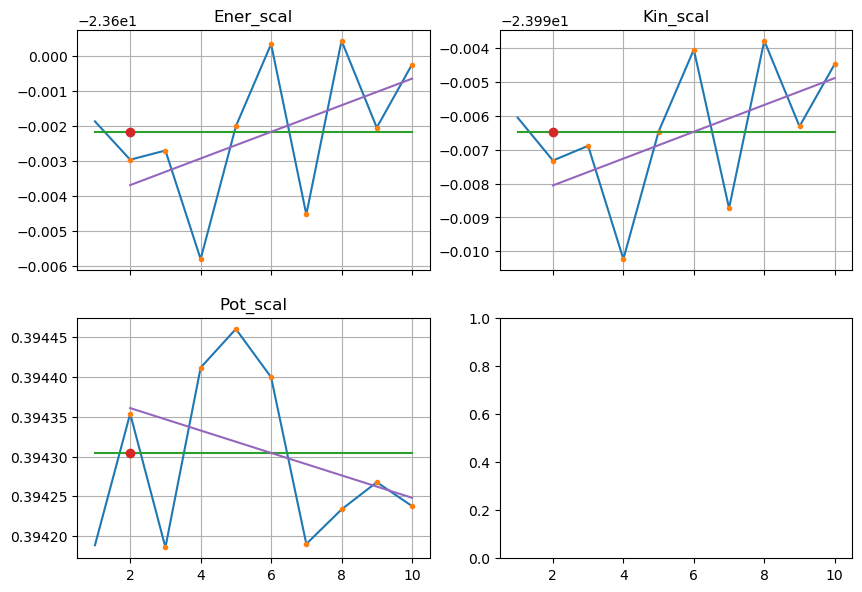

In [11]:
sim.check_warmup(['Ener_scal', 'Kin_scal', 'Pot_scal'])

Ener_scal
Kin_scal
updating to N_rebin=3


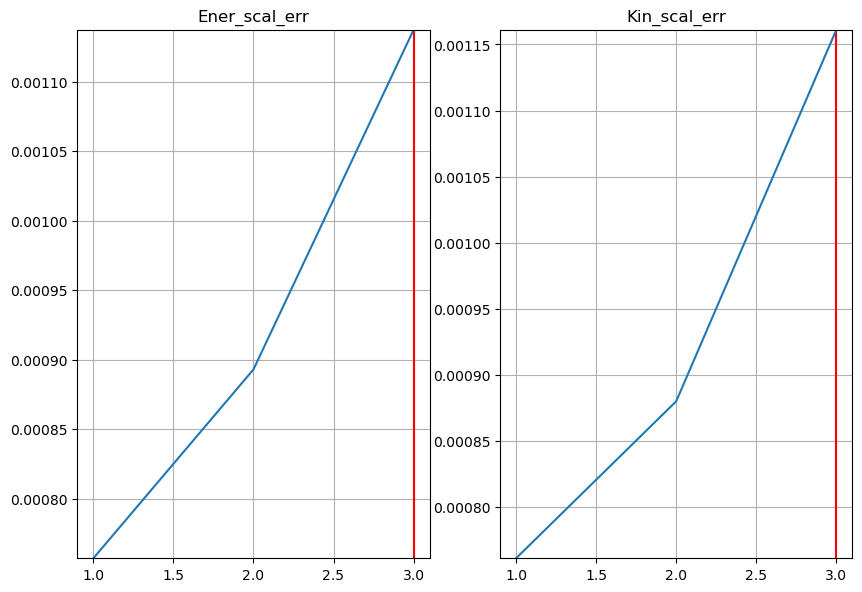

In [12]:
sim.check_rebin(['Ener_scal', 'Kin_scal'])

**5.** Perform some simple analyses:

In [13]:
sim.analysis()

### Analyzing /home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard ###
/home/jonas/Programs/pyALF/Notebooks
Custom observables:
Scalar observables:
Ener_scal
Kin_scal
Part_scal
Pot_scal
Histogram observables:
Equal time observables:
Den_eq
Green_eq
SpinT_eq
SpinXY_eq
SpinZ_eq
Time displaced observables:
Den_tau
Green_tau
SpinT_tau
SpinXY_tau
SpinZ_tau


**6.** Store computed observables list:

In [14]:
obs = sim.get_obs()
# Pandas Dataframe with one row per simulation, containing parameters and observables

/home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard


In [15]:
obs

,continuous,ham_chem,ham_t,ham_t2,ham_tperp,ham_u,ham_u2,mz,l1,l2,...,SpinXY_tauK,SpinXY_tauK_err,SpinXY_tauR,SpinXY_tauR_err,SpinXY_tau_lattice,SpinZ_tauK,SpinZ_tauK_err,SpinZ_tauR,SpinZ_tauR_err,SpinZ_tau_lattice
/home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard,0,0.0,1.0,1.0,1.0,0.1,0.1,1,4,4,...,"[[0.5081224103003499, 0.37860265916946845, 0.5...","[[3.943173992758261e-05, 0.0003094567123162275...","[[0.0006992854903933124, -0.07130264058235974,...","[[1.3255142435706599e-05, 2.1487990008301313e-...","{'L1': [4.0, 0.0], 'L2': [0.0, 4.0], 'a1': [1....","[[0.5079338228212582, 0.37830632361920574, 0.5...","[[0.0007330569327360936, 0.0005121843135615222...","[[0.000957305142970849, -0.07151352756812955, ...","[[0.0003283104738814887, 3.811217910286902e-05...","{'L1': [4.0, 0.0], 'L2': [0.0, 4.0], 'a1': [1...."


In [16]:
obs.iloc[0]

continuous                                                           0
ham_chem                                                           0.0
ham_t                                                              1.0
ham_t2                                                             1.0
ham_tperp                                                          1.0
                                           ...                        
SpinZ_tauK           [[0.5079338228212582, 0.37830632361920574, 0.5...
SpinZ_tauK_err       [[0.0007330569327360936, 0.0005121843135615222...
SpinZ_tauR           [[0.000957305142970849, -0.07151352756812955, ...
SpinZ_tauR_err       [[0.0003283104738814887, 3.811217910286902e-05...
SpinZ_tau_lattice    {'L1': [4.0, 0.0], 'L2': [0.0, 4.0], 'a1': [1....
Name: /home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard, Length: 110, dtype: object

which are available for further analyses. For instance, the internal energy of the system (and its error) is accessed by:

In [17]:
obs.iloc[0][['Ener_scal0', 'Ener_scal0_err', 'Ener_scal_sign', 'Ener_scal_sign_err']]

Ener_scal0           -23.602171
Ener_scal0_err         0.001137
Ener_scal_sign              1.0
Ener_scal_sign_err          0.0
Name: /home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard, dtype: object

**New:** 2dplot on bravais lattice

In [18]:
from alf_ana.lattice import Lattice
import matplotlib.pyplot as plt
import matplotlib as mpl

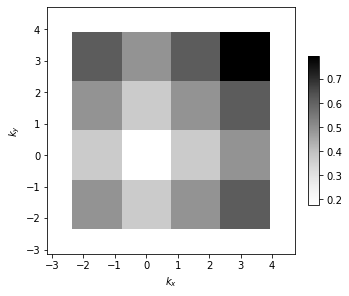

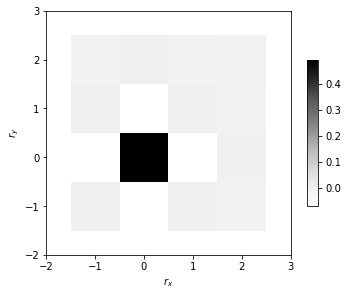

In [19]:
latt = Lattice(obs.iloc[0].Den_eq_lattice)
dat = obs.iloc[0].Den_eqK[0, 0]
latt.plot_k(dat)

dat = obs.iloc[0].Den_eqR[0, 0]
latt.plot_r(dat)